In [1]:
import pickle

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import community
import seaborn as sns

In [ ]:
# Load self.data from the pickle file
with open('outputfolder/simulation_data.pkl', 'rb') as file:
    data = pickle.load(file)

In [3]:
# Load self.matrix_list from the pickle file
with open('outputfolder/matrix_list.pkl', 'rb') as file:
    matrix_list = pickle.load(file)


# Single frame

In [ ]:
L = 5
density = 0.3

N = L*L - int(density * L*L)
G = nx.Graph()
G.add_nodes_from(range(N))

# Compute initial positions using spring layout
pos = nx.spring_layout(G, seed=54)

# Compute the best partition using the Louvain algorithm
partition = community.best_partition(G)

# Assign a distinct color to each cluster
cluster_colors = sns.color_palette('hls', n_colors=N).as_hex()

matrix = matrix  # Replace 'your_single_matrix' with your actual matrix

# Clear the graph
G.clear()

# Add nodes to the graph
G.add_nodes_from(range(N))

# Add edges to the graph based on the matrix
for i in range(N):
    for j in range(N):
        if i != j and matrix[i, j] > 0.5:  # Exclude self-edges
            G.add_edge(i, j, weight=matrix[i, j])

# Detect clusters and color nodes accordingly
partition = community.best_partition(G)
node_colors = [cluster_colors[partition[node]] for node in G.nodes()]

node_sizes = 500  # Change node size here

# Plot the graph
plt.figure(figsize=(15, 10))  # Adjust the figure size if desired
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes)
nx.draw_networkx_edges(G, pos, width=0.1)
nx.draw_networkx_labels(G, pos, font_weight='medium', font_size=20)
plt.title('Static Graph')
plt.axis('off')
plt.show()


# Movie

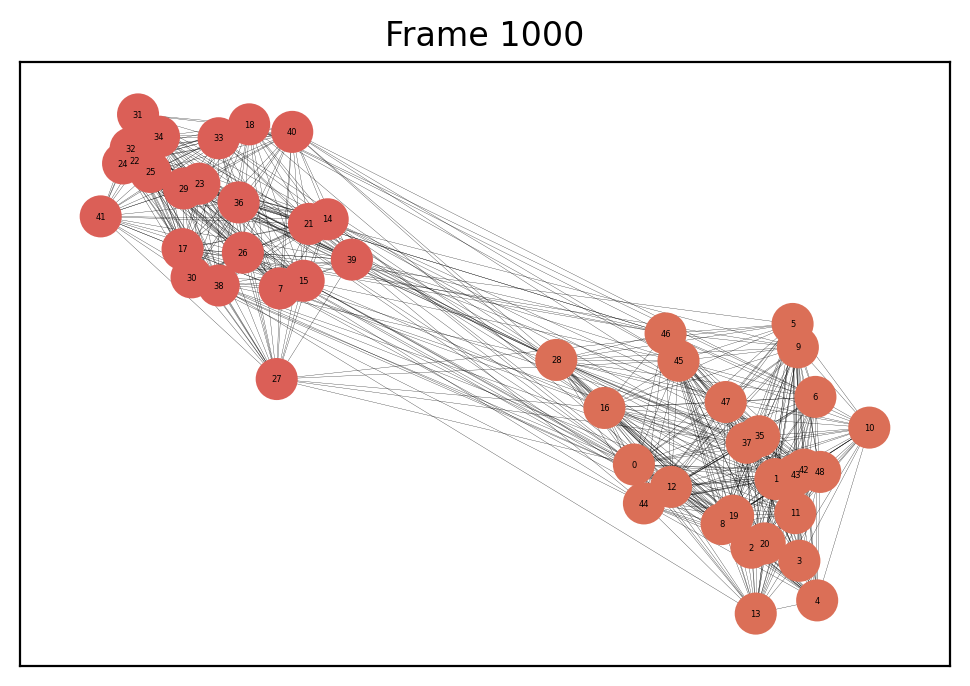

In [48]:
N = 49
G = nx.Graph()
G.add_nodes_from(range(N))

# Compute initial positions using spring layout
pos = nx.spring_layout(G, seed=38)

# Compute the best partition using the Louvain algorithm
partition = community.best_partition(G)

# Assign a distinct color to each cluster
cluster_colors = sns.color_palette('hls', n_colors=N).as_hex()

# Define the update function to animate the changes in the graph
def update(frame):
    plt.cla()
    G.clear()  # Clear the graph at each frame
    G.add_nodes_from(range(N))  # Add the N nodes to the graph at each frame
    for i in range(N):
        for j in range(N):
            if i != j and matrix_list[frame][i, j] > 0:  # Exclude self-edges
                G.add_edge(i, j, weight=matrix_list[frame][i, j])

    # Update positions of nodes based on the previous frame's positions
    if frame > 0:
        new_pos = nx.spring_layout(G, seed=38)  # Compute new positions
        for node in pos:
            pos[node] += (new_pos[node] - pos[node]) * 0.1

    # Detect clusters and color nodes accordingly
    partition = community.best_partition(G)
    node_colors = [cluster_colors[partition[node]] for node in G.nodes()]

    node_sizes = 200  # Change node size here

    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes)
    nx.draw_networkx_edges(G, pos, width=0.1)
    nx.draw_networkx_labels(G, pos, font_weight='medium', font_size=3)
    plt.title(f'Frame {frame+1}')

# Rest of the code remains the same
# Create the animation using FuncAnimation
fig, ax = plt.subplots()
fig.set_dpi(200)  # Increase the resolution here
animation = FuncAnimation(fig, update, frames=range(len(matrix_list)), interval=75)

# Save the animation as a video file with higher dpi
animation.save('graph_animation3.mp4', writer='ffmpeg', dpi=200)  # Change the file name and writer if desired
